In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [162]:
results = pd.read_csv("resultado_junto.csv")

bresults = results[results["binarized"] == 1]
nbresults = results[results["binarized"] == 0]

In [163]:
positions = {(0, 0): "AZUL4.SA",
             (1, 0): "PRIO3.SA",
             (0, 1): "TSLA",
             (1, 1): "VIVA3.SA"}

In [189]:
def r_squared(poly1d_fn, x, y):
    # Calculando o R²
    y_pred = poly1d_fn(x)  # Valores previstos pela regressão
    ss_res = np.sum((y - y_pred) ** 2)  # Soma dos quadrados dos resíduos
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Soma dos quadrados totais
    r_squared = 1 - (ss_res / ss_tot)  # Cálculo do R²

    return r_squared


def linear_regression(x, y):
    coef = np.polyfit(x, y, 1)  # Coeficientes da regressão linear
    poly1d_fn = np.poly1d(coef)

    return poly1d_fn


def plot_graph(data_x, data_y, xmin, xmax, ymin, ymax, axes, row, column, graph, title, label = None, regression = False):
    if graph == "bar":
        axes[row, column].bar(data_x, data_y, label = label)
    elif graph == "scatter":
        axes[row, column].scatter(data_x, data_y, label = label)
    else:
        axes[row, column].plot(data_x, data_y, label = label)
        
    if regression:
        poly1d_fn = linear_regression(data_x, data_y)
        r2 = round(r_squared(poly1d_fn, data_x, data_y), 2)
        axes[row, column].plot(data_x, poly1d_fn(data_x), color='red', label=r2)
        axes[row, column].legend()

    axes[row, column].set_title(title)
    axes[row, column].set_xlim(xmin, xmax)
    axes[row, column].set_ylim(ymin, ymax)


def plot_graphs(data, x, y, graph, both = False, regression = False):
    fig, axes = plt.subplots(2, 2)
    axes.flatten()

    if "/" in x:
        trade, stat = x.split("/")
        data_x = ast.literal_eval(data["Total Dict"])[trade][stat]
    else:
        data_x = data[x]

    if "/" in y:
        trade, stat = y.split("/")
        data_y = ast.literal_eval(data["Total Dict"])[trade][stat]
    else:
        data_y = data[y]

    xmin, xmax = np.min(data_x), np.max(data_x)
    ymin, ymax = np.min(data_y), np.max(data_y)
    xmin, xmax = (1 - np.sign(xmin) * 0.4)*xmin, 1.05*xmax
    ymin, ymax = (1 - np.sign(ymin) * 0.4)*ymin, 1.05*ymax

    for position, title in positions.items():
        if both:
            plot_graph(data_x[(data_x["Stock"] == title) & (data_x["binarized"] == 0)], 
                       data_y[(data_y["Stock"] == title) & (data_y["binarized"] == 0)], 
                       xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, label = "NB", regression = regression)
            plot_graph(data_x[(data_x["Stock"] == title) & (data_x["binarized"] == 1)], 
                       data_y[(data_y["Stock"] == title) & (data_y["binarized"] == 1)], 
                       xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, label = "B", regression = regression)
            axes[position[0], position[1]].legend()
        else:
            plot_graph(data_x[data_x["Stock"] == title], data_y[data_y["Stock"] == title], xmin, xmax, ymin, ymax, axes, position[0], position[1], graph, title, regression = regression)

    axes[0, 0].set_ylabel(y)
    axes[1, 0].set_ylabel(y)
    axes[1, 0].set_xlabel(x)
    axes[1, 1].set_xlabel(x)

    fig.suptitle(f"{x} x {y}")

    plt.tight_layout()
    plt.show()

ValueError: malformed node or string: 0     {'-1.0': {'precision': 0.5, 'recall': 0.102040...
1     {'-1.0': {'precision': 0.4482758620689655, 're...
2     {'-1.0': {'precision': 0.4090909090909091, 're...
3     {'-1.0': {'precision': 0.5, 'recall': 0.071428...
4     {'-1.0': {'precision': 0.5714285714285714, 're...
                            ...                        
95    {'-1.0': {'precision': 0.3918918918918919, 're...
96    {'-1.0': {'precision': 0.38571428571428573, 'r...
97    {'-1.0': {'precision': 0.36666666666666664, 'r...
98    {'-1.0': {'precision': 0.3611111111111111, 're...
99    {'-1.0': {'precision': 0.4444444444444444, 're...
Name: Total Dict, Length: 100, dtype: object

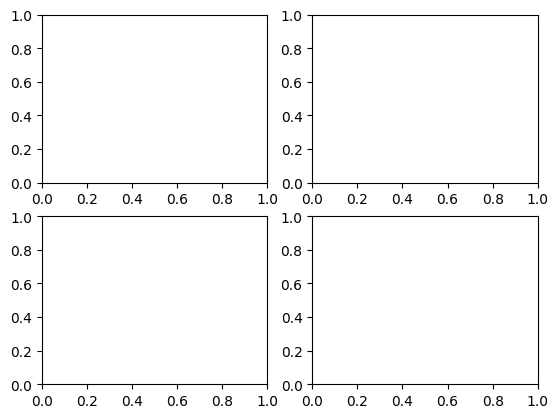

In [190]:
plot_graphs(data = bresults, x = "Features", y = "-1.0/precision", graph = "line", both = False, regression = True)

In [192]:
results["Total Dict"].values

array(["{'-1.0': {'precision': 0.5, 'recall': 0.10204081632653061, 'f1-score': 0.1694915254237288, 'support': 98.0}, '0.0': {'precision': 0.2773109243697479, 'recall': 0.4925373134328358, 'f1-score': 0.3548387096774194, 'support': 67.0}, '1.0': {'precision': 0.36036036036036034, 'recall': 0.47058823529411764, 'f1-score': 0.40816326530612246, 'support': 85.0}, 'accuracy': 0.332, 'macro avg': {'precision': 0.37922376157670273, 'recall': 0.355055455017828, 'f1-score': 0.31083116680242356, 'support': 250.0}, 'weighted avg': {'precision': 0.392841850253615, 'recall': 0.332, 'f1-score': 0.3003129623637317, 'support': 250.0}}",
       "{'-1.0': {'precision': 0.4482758620689655, 'recall': 0.1326530612244898, 'f1-score': 0.2047244094488189, 'support': 98.0}, '0.0': {'precision': 0.2542372881355932, 'recall': 0.44776119402985076, 'f1-score': 0.32432432432432434, 'support': 67.0}, '1.0': {'precision': 0.3592233009708738, 'recall': 0.43529411764705883, 'f1-score': 0.39361702127659576, 'support': 8